In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('telecom.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5032,5429-LWCMV,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.15,1057.55,No
2252,1813-JLKWR,Female,0,Yes,Yes,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,1336.65,No
5057,7354-OIJLX,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.85,724.65,No
3961,7421-ZLUPA,Female,0,No,No,8,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,29.25,226.95,No
1725,5935-FCCNB,Female,1,No,No,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,1608.15,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.select_dtypes(include=['object'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [11]:
#replacing ' ' empty values with nan
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)

In [12]:
#changing totalcharges and Seniorcitizen column from string to float
df['totalcharges'] = df['totalcharges'].astype(float)
df['seniorcitizen'] = df['seniorcitizen'].astype(float)

In [13]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

###### There are 11 null values in totalcharges

In [14]:
df.info()
#totalcharges and seniorcitizen is now converted to float64 from string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   float64
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [15]:
import seaborn as sns

<Axes: xlabel='totalcharges', ylabel='Count'>

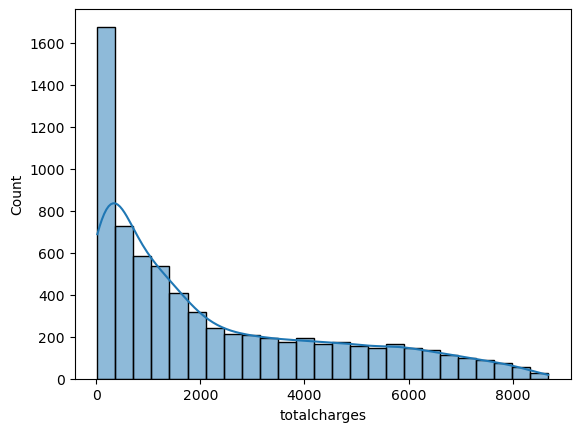

In [16]:
sns.histplot(df['totalcharges'],kde=True)


In [17]:
df_updated=df.copy()


<Axes: >

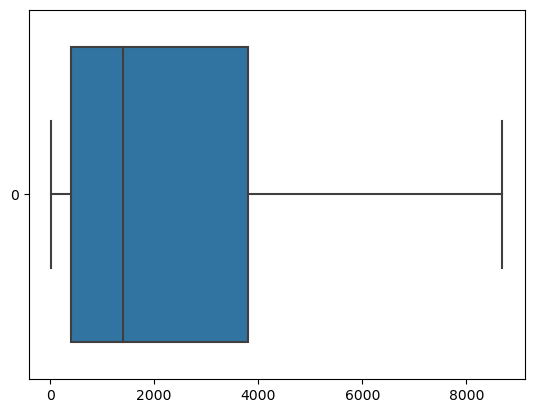

In [18]:
sns.boxplot(df['totalcharges'],orient='h')

In [19]:
#customerid columns is dropped from the dataframe
df.drop(columns=['customerid'],axis=1,inplace=True)

In [20]:
#selecting only categorical column
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [21]:
#dropping out target column from categorical
cat_cols = cat_cols.drop('churn')

In [22]:
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [23]:
#selecting only totalcharges column to apply imputation by mean which contains null values
impute_cols = df[['totalcharges']].columns
impute_cols

Index(['totalcharges'], dtype='object')

In [24]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Axes: xlabel='totalcharges', ylabel='Count'>

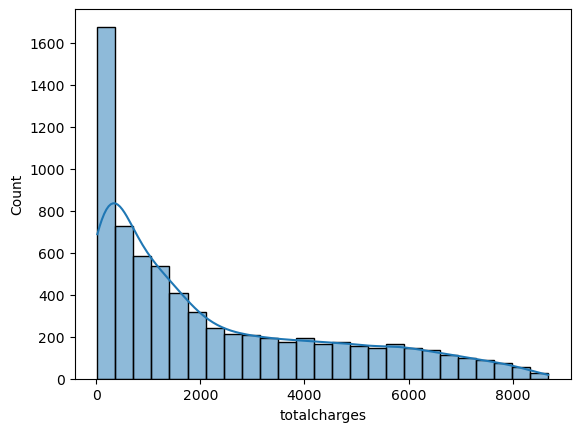

In [25]:
# Plot histograms for numeric columns: 
sns.histplot(df['totalcharges'],kde=True)


In [26]:
# Convert all categorical variables to numeric for further analysis using one-hot encoding
df = pd.get_dummies(df)

In [27]:
# Check for any duplicated rows
print("\nNumber of duplicated rows before cleaning:", df.duplicated().sum())


Number of duplicated rows before cleaning: 22


In [28]:
# Remove duplicated rows
df = df.drop_duplicates()

In [29]:
# Check for any duplicated rows after cleaning
print("Number of duplicated rows after cleaning:", df.duplicated().sum())

Number of duplicated rows after cleaning: 0


<Axes: xlabel='monthlycharges', ylabel='Count'>

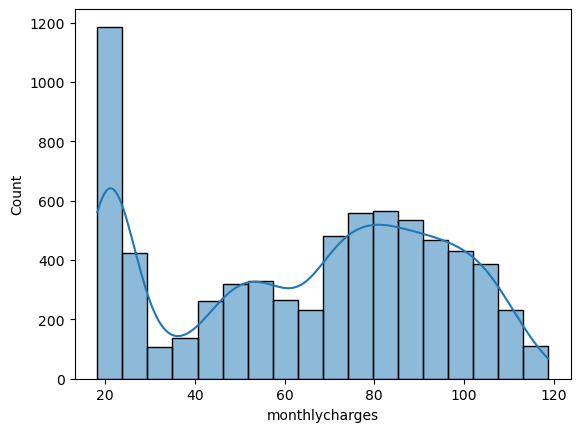

In [30]:
sns.histplot(df['monthlycharges'],kde=True)

<Axes: xlabel='tenure', ylabel='Count'>

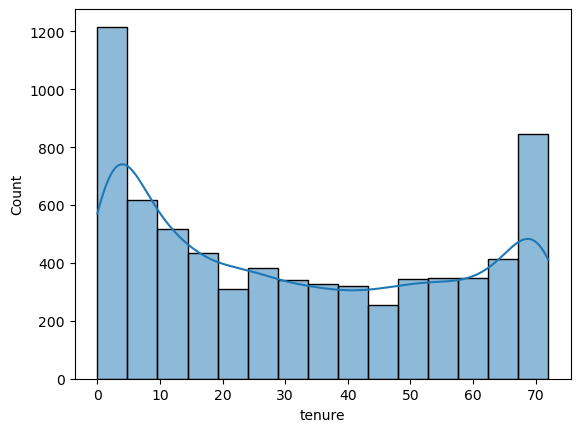

In [31]:
sns.histplot(df['tenure'],kde=True)


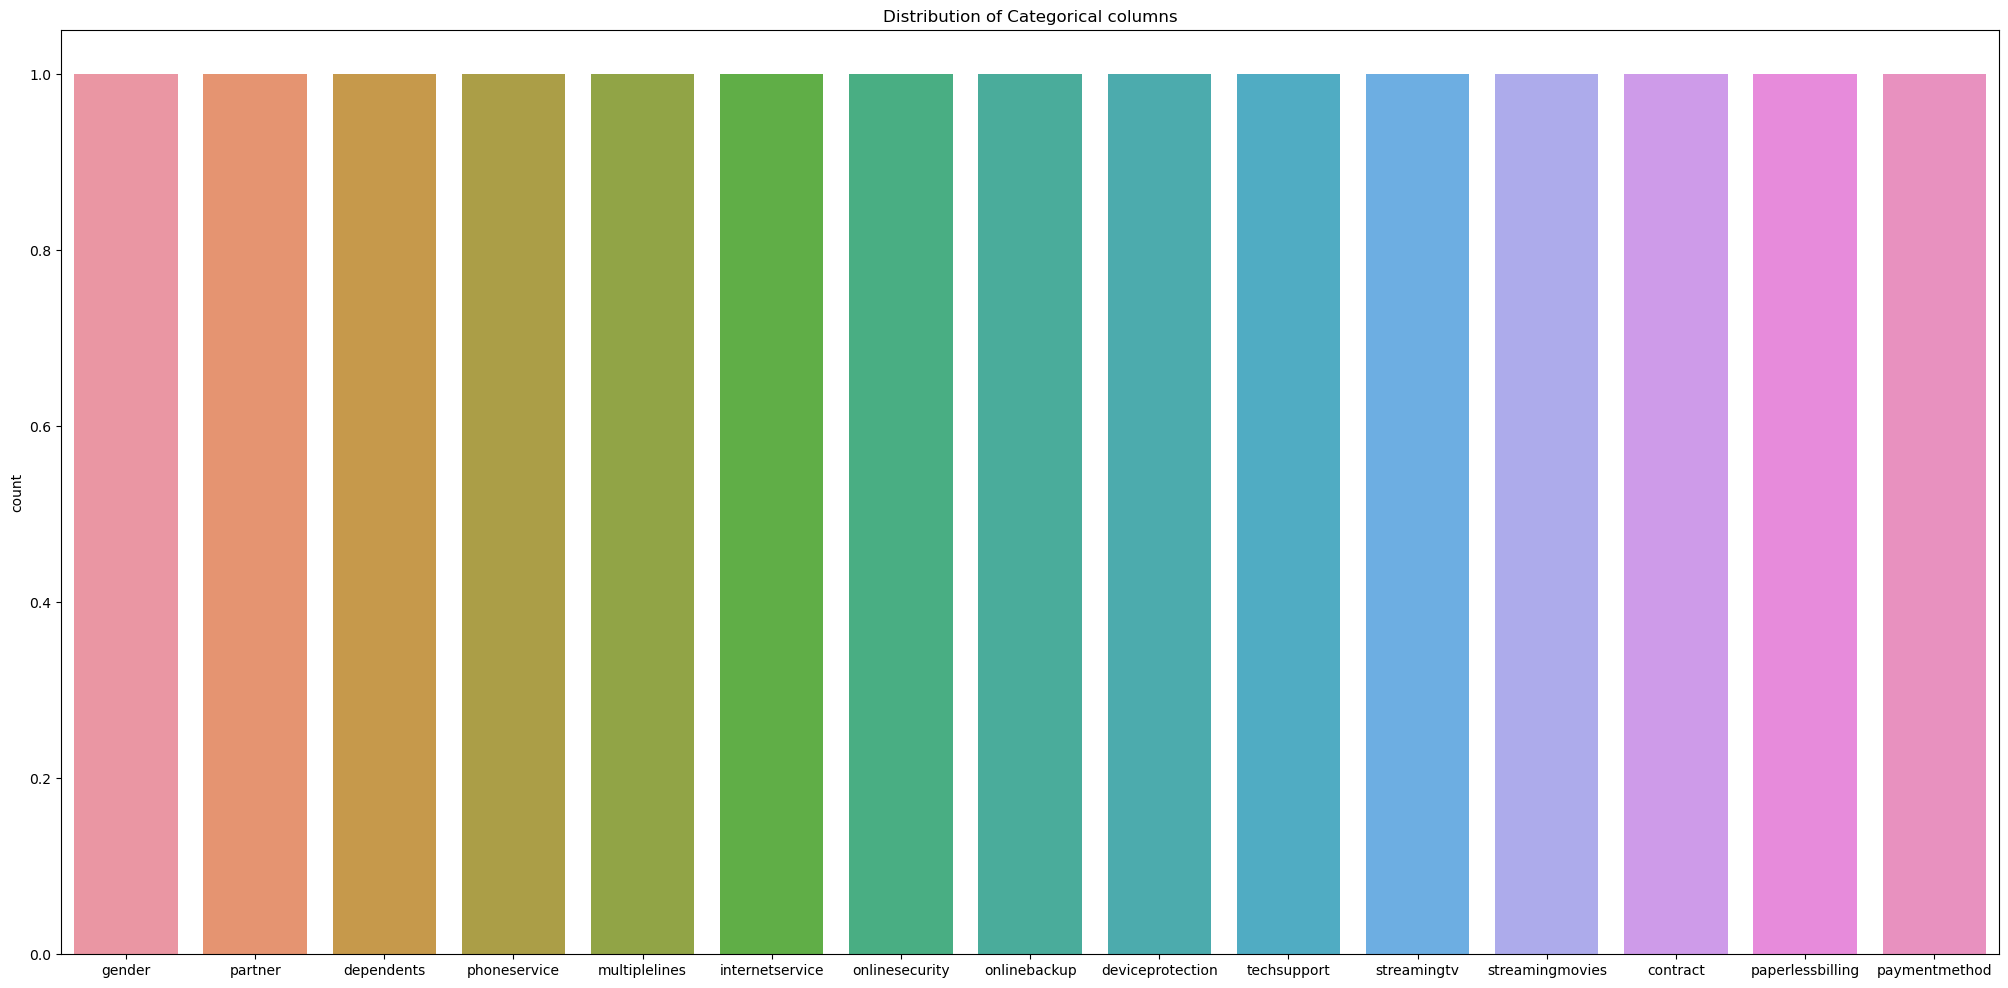

In [32]:
# Plot count plots for categorical columns
plt.figure(figsize=(25, 12))
sns.countplot(x= cat_cols, data=df)
plt.title('Distribution of Categorical columns')
plt.show()



In [33]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_updated['internetservice'] = df_updated['internetservice'].map({'Yes': 1, 'No': 0})
df_updated['phoneservice'] = df_updated['phoneservice'].map({'Yes': 1, 'No': 0})
df_updated['multiplelines'] = df_updated['multiplelines'].map({'Yes': 1, 'No': 0})
df_updated['churn'] = df_updated['churn'].map({'Yes': 1, 'No': 0})

In [34]:
# Calculate correlation matrix
correlation_matrix = df_updated[['phoneservice', 'multiplelines', 'internetservice', 'churn']].corr()

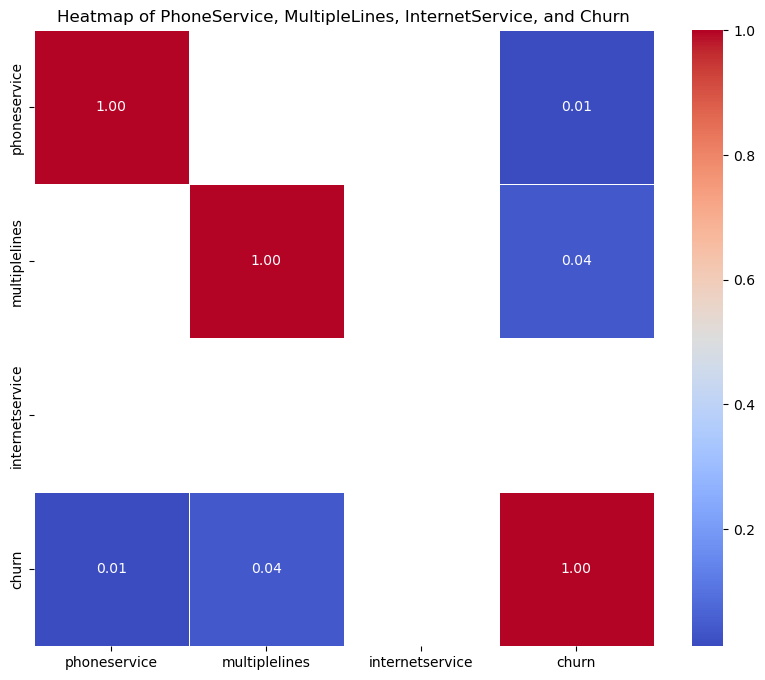

In [35]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of PhoneService, MultipleLines, InternetService, and Churn')
plt.show()


In [51]:
num_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns
for column in num_cols:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'seniorcitizen': [0. 1.]
Column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column 'monthlycharges': [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column 'totalcharges': [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


# Normalization

In [52]:
# Create a scaler object
scaler = MinMaxScaler()

In [53]:
df[num_cols]

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,1,29.85,29.85
1,0.0,34,56.95,1889.50
2,0.0,2,53.85,108.15
3,0.0,45,42.30,1840.75
4,0.0,2,70.70,151.65
...,...,...,...,...
7038,0.0,24,84.80,1990.50
7039,0.0,72,103.20,7362.90
7040,0.0,11,29.60,346.45
7041,1.0,4,74.40,306.60


In [54]:
df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
df_normalized

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330
...,...,...,...,...
7016,0.0,0.333333,0.662189,0.227521
7017,0.0,1.000000,0.845274,0.847461
7018,0.0,0.152778,0.112935,0.037809
7019,1.0,0.055556,0.558706,0.033210
